## Etapa 1

- importando a biblioteca pandas e lendo o arquivo csv para iniciar as atividades no dataset
- Removendo linhas duplicadas com o comando ".drop_duplicates()" e eliminando linhas desnecessárias  da coluna tipo usando o comando ".isin()" e passando os parâmetros.

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt

dados = pd.read_csv("C:/Users/yasmi/Desktop/CompassUol/Sprint03/googleplaystore.csv")

dados = dados.drop_duplicates()
dados = dados[dados['Type'].isin(['Paid', 'Free'])]

dados


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


___

## Etapa 2

**Objetivo**: fazer um gráfico de barras contendo o top 5 apps por número de instalação.

- Iniciei criando uma variável já ordenando o dataframe (utilizando o comando .sort_values) pela coluna de instalações de forma decrescente e selecionando somente as 5 primeiras linhas (o top 5);

- e então comecei a adequar os valores antes de colocá-los em um gráfico, transformando a coluna de instalações de str para númerica (utilizando o comando pd.to_numeric) e retirei os caracteres especiais;

- após isso comecei a criar o gráfico de barras baseado na variável criada, definindo o tamanho do gráfico, edição de titulos e formatação.

- adicionei uma linha para formatar os valores do eixo y para milhar. Sendo o comando ".get_yaxis()" para obter o eixo y do gráfico e o comando ".set_major_formatter(plt.FuncFormatter(lambda x, loc:" para aplicar uma formatação personalizada onde adiciona separadores de milhasr nesse eixo, e por fim o comando "f'{int(x):,}'" para usar virgulas como separadores.


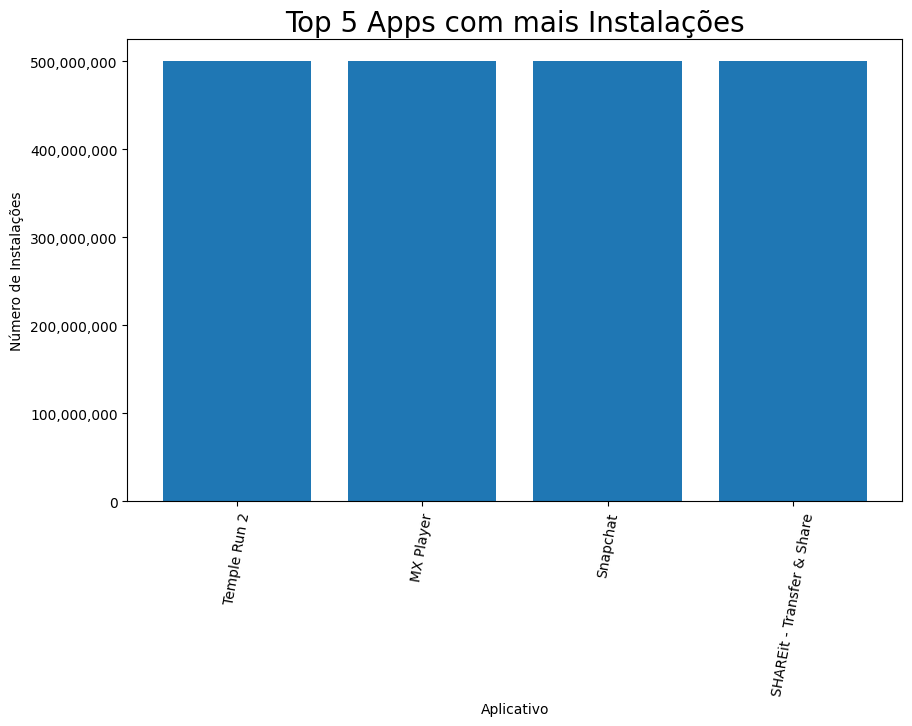

In [ ]:
top_5_instalacoes = dados.sort_values(by='Installs', ascending=False).head(5)

top_5_instalacoes['Installs'] = pd.to_numeric(top_5_instalacoes['Installs'].replace({'[+,]': ''}, regex=True))

plt.figure(figsize=(10, 6))  
plt.bar(top_5_instalacoes['App'], top_5_instalacoes['Installs'])
plt.title('Top 5 Apps com mais Instalações', size=20)
plt.xlabel('Aplicativo')
plt.ylabel('Número de Instalações')
plt.xticks(rotation=80)

# formatando o eixo y para exibir com separadores de milhar
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: f'{int(x):,}'))

plt.show()


___

## Etapa 3

**Objetivo**: fazer um gráfico de pizza (pie chart) mostrando as categorias de apps existentes no dataset de acordo com a frequência em que elas aparecem

- Criei uma variável que conta quantas vezes cada valor aparece na coluna das categorias de apps utilizando o comando ".value_counts()";

- e então defini uma lista com códigos hexadecimais que vão ser usados no gráfico;

- criei o gráfico de pizza usando a variável criada e formatei ela para deixar a visualização o mais limpa possível, para isso, deixei somente a porcentagem na figura e adicionei uma legenda com os nomes das catgorias diferenciando elas por cores.

    - Legenda: "apps_categorias.index" usa o nome das categorias como os rótulos da legenda, "bbox_to_anchor=(1.5, 1), loc='upper right', borderaxespad=0" posiciona a legenda fora da área do gráfico e formata o espaçamento e a posição dela.


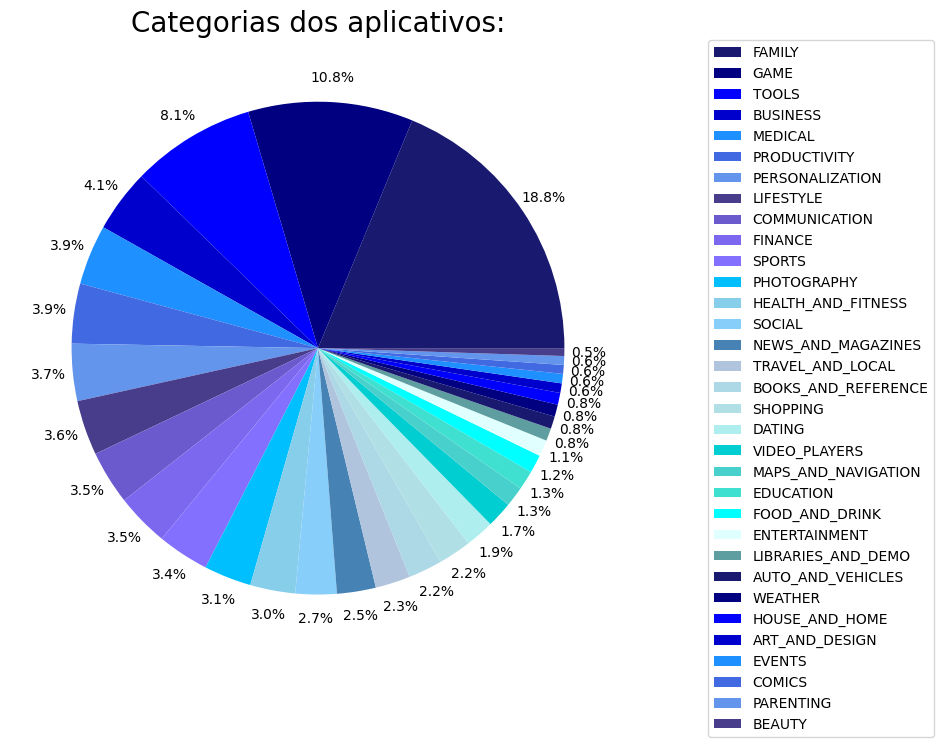

In [ ]:
apps_categorias = dados['Category'].value_counts()

cores = ['#191970', '#000080', '#0000FF', '#0000CD', '#1E90FF', '#4169E1', '#6495ED', '#483D8B', '#6A5ACD', '#7B68EE', '#8470FF', '#00BFFF', '#87CEEB', '#87CEFA', 
        '#4682B4', '#B0C4DE', '#ADD8E6', '#B0E0E6', '#AFEEEE', '#00CED1', '#48D1CC', '#40E0D0', '#00FFFF', '#E0FFFF', '#5F9EA0',]

plt.figure(figsize=(8, 8))
plt.pie(apps_categorias, autopct='%1.1f%%',pctdistance=1.1, colors=cores)
plt.title("Categorias dos aplicativos:", fontsize=20,)
plt.legend(apps_categorias.index, bbox_to_anchor=(1.5, 1), loc='upper right', borderaxespad=0)
plt.show()

___

## Etapa 4

**Objetivo**: mostrar qual o app mais caro existente no dataset

- Utilizei a função .replace para retirar os caracteres especiais da coluna Price para ter um reultado mais limpo e transformei ela em numérica;

- então criei uma variável que puxa somente os valores em que a coluna "tipo" é igual a "pago", e ordenei a coluna de forma decrescente e pegando o primeiro valor, que é o app mais caro.

In [ ]:
dados['Price'] = dados['Price'].replace({r'\$': '', ',': ''}, regex=True)
dados['Price'] = pd.to_numeric(dados['Price'], errors='coerce')

app_mais_caro = dados[dados['Type'] == 'Paid'].sort_values(by='Price', ascending=False).head(1)

print(app_mais_caro[['App', 'Price']])

                           App  Price
4367  I'm Rich - Trump Edition  400.0


___

## Etapa 5

**Objetivo**: mostrar quantos apps são classificados como “mature 17+”

- Filtrei o dataframe retornando somente os valores da coluna de "Content Rating" que são "Mature 17+" 

In [40]:
quantidade_mature = dados[dados['Content Rating'] == 'Mature 17+'].shape[0]

print(f"Quantidade de apps classificados como 'Mature 17+': {quantidade_mature}")

Quantidade de apps classificados como 'Mature 17+': 447


___

## Etapa 6 

**Objetivo**: mostar o top 10 apps por número de views  e seu número de views, ordenanr a lista em forma decrescente por número de views

- trasformei a coluna Reviews em numérica utilizando o comando "pd.to_numeric" e o comando "errors='coerce'" para retornar NaN caso algum valor não seja convertido;

- retirei espaços brancos da coluna "App" utilizando .strip() e deixei todos os nomes em letras minusculas com .lower();

- então crie uma variável agrupando todos os registros do mesmo aplicativos (das versões do mesmo app). E para cada grupo, cácular o valor máximo de avaliações com o comando ".agg({'Reviews': 'max'})"

- usei o sorted para organizar a coluna reviews de forma decrescente e retornar as 10 primeiras linhas, sendo eles os top 10 apps com maior avaliação

- por fim, exibi somente as colunas app e reviews da variável.

In [41]:
dados['Reviews'] = pd.to_numeric(dados['Reviews'], errors='coerce')
dados['App'] = dados['App'].str.strip().str.lower()

apps_top10_views = dados.groupby('App').agg({'Reviews': 'max'}).reset_index()
apps_top10_views = apps_top10_views.sort_values(by='Reviews', ascending=False).head(10)

print(apps_top10_views[['App', 'Reviews']])

                                                    App   Reviews
4249                                           facebook  78158306
9320                                 whatsapp messenger  69119316
5560                                          instagram  66577446
6344           messenger – text and video chat for free  56646578
2428                                     clash of clans  44893888
2439            clean master- space cleaner & antivirus  42916526
8330                                     subway surfers  27725352
9524                                            youtube  25655305
7936  security master - antivirus, vpn, applock, boo...  24900999
2430                                       clash royale  23136735


___

## Etapa 7

**Objetivo**: criar pelo menos mais 2 cálculos sobre o dataset  e  apresentar um em forma de lista e outro em formato de valor.

- Top 10 apps por número de reviews


    - como na etapa anterior, agrupei os aplicativos que se repetem e para cada grupo calcular a soma de reviews e transformei a coluna Reviews em numérica;

    - então ordenei os aplicativos pela soma das reviews e mostrando as 10 primeiras linhas

In [42]:
dados_agrupados = dados.groupby('App')['Reviews'].sum().reset_index()
dados['Reviews'] = pd.to_numeric(dados['Reviews'], errors='coerce')

top_10_reviews = dados_agrupados.sort_values(by='Reviews', ascending=False).head(10)

print("Top 10 Apps por número de Reviews:")
print(top_10_reviews)

Top 10 Apps por número de Reviews:
                                           App    Reviews
5560                                 instagram  199664676
4249                                  facebook  156286514
8330                            subway surfers  138606606
9320                        whatsapp messenger  138228988
2428                            clash of clans  134667058
6344  messenger – text and video chat for free  113289425
2017                          candy crush saga  112134492
100                                8 ball pool   99386198
2430                              clash royale   92530298
8126                                  snapchat   68045010


- Número médio de instalações

    - novamente utilizei a função .replace() para retirar caracteres especiais da coluna "Installs"

    - trasformei a coluna de instalações em numérica

    - criei uma variável que utiliza a função .mean() para calcular a média dos nomeros de instações geral 

In [43]:
dados['Installs'] = dados['Installs'].replace({',': '', r'\+': ''}, regex=True)
dados['Installs'] = pd.to_numeric(dados['Installs'], errors='coerce')

media_instalacoes = dados['Installs'].mean()

print(f'Número médio de instalações: {media_instalacoes:.2f}')

Número médio de instalações: 14159126.55


___

## Etapa 8

**Obetivo**: criar pelo menos 2 outras formas gráficas de exibição dos indicadores acima utilizando a biblioteca matplotlib. Escolha tipos de gráficos diferentes dos explorados acima, ex: linhas e dispersão



- gráfico de disperção do top 10 apps por reviews

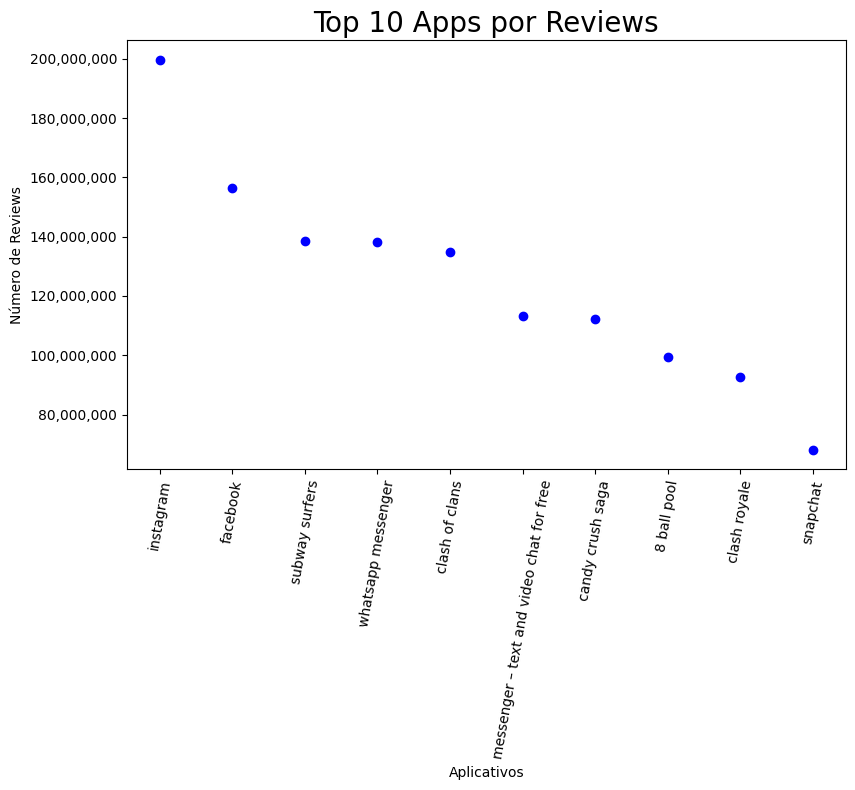

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.scatter(top_10_reviews['App'], top_10_reviews['Reviews'], color='blue', marker='o')
plt.title("Top 10 Apps por Reviews", fontsize=20)
plt.xticks(rotation=80)
plt.xlabel("Aplicativos")
plt.ylabel("Número de Reviews")
plt.tight_layout()

# Formatar o eixo y para exibir com separadores de milhar
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: f'{int(x):,}'))

plt.show()

- gráfico de linha do numero médio de instalações

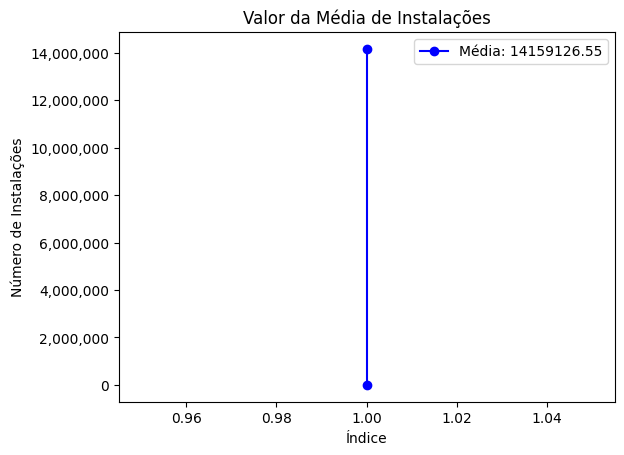

In [45]:
plt.plot([1, 1], [0, media_instalacoes], color='blue', marker='o', label=f'Média: {media_instalacoes:.2f}')
plt.title('Valor da Média de Instalações')
plt.xlabel('Índice')
plt.ylabel('Número de Instalações')

# Formatar o eixo y para exibir com separadores de milhar
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: f'{int(x):,}'))

plt.legend()
plt.show()